<a href="https://colab.research.google.com/github/ShriyaGandotra/Intro-Machine-Learning/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Machine Learning/Assignment 5')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [18]:
# Linear model
def linear_model(t_u, w, b):
  return w * t_u + b

In [19]:
# Non-Linear model
def nonlinear_model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b


In [20]:
# Loss function
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [21]:
# training loop
def training_loop_linear(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = linear_model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params


In [22]:
# training loop
def training_loop_nonlinear(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = nonlinear_model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [23]:
# Training function
def train(X, y, epochs, learning_rate, optimizer_type):
    # Initialize parameters
    w = torch.ones((X.shape[1],), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)

    # Set up the optimizer
    if optimizer_type == 'adam':
        optimizer = optim.Adam([w, b], lr=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = optim.SGD([w, b], lr=learning_rate)

    loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        optimizer.zero_grad()

        # Forward pass
        y_pred = X @ w + b
        loss = torch.mean((y - y_pred) ** 2)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0 or epoch == epochs - 1:
            with torch.no_grad():
                y_val_pred = X_val @ w + b
                val_loss = torch.mean((y_val - y_val_pred) ** 2)

            loss_history.append(loss.item())
            val_loss_history.append(val_loss.item())

            print(f'Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return w, b, loss_history, val_loss_history

Epoch 500, Loss 14.701760
Epoch 1000, Loss 4.791175
Epoch 1500, Loss 3.168480
Epoch 2000, Loss 2.889100
Epoch 2500, Loss 2.827807
Epoch 3000, Loss 2.802263
Epoch 3500, Loss 2.782912
Epoch 4000, Loss 2.764956
Epoch 4500, Loss 2.747607
Epoch 5000, Loss 2.730726


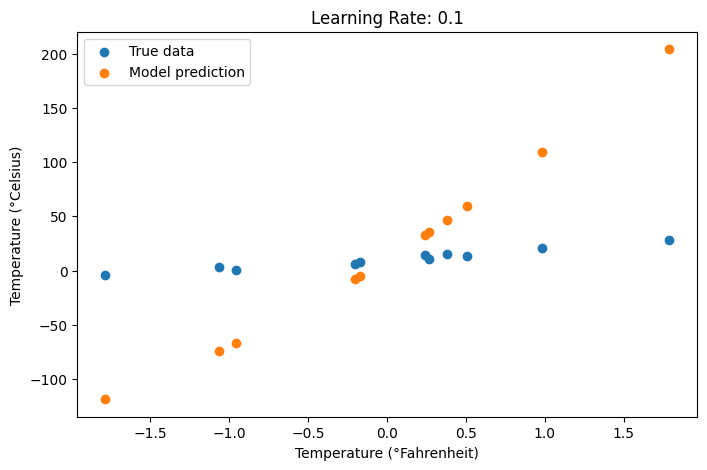

Final parameters for learning rate 0.1: [90.41634  10.067668 10.40856 ]


Epoch 500, Loss 63.448009
Epoch 1000, Loss 53.381542
Epoch 1500, Loss 44.988480
Epoch 2000, Loss 37.990604
Epoch 2500, Loss 32.155952
Epoch 3000, Loss 27.291077
Epoch 3500, Loss 23.234743
Epoch 4000, Loss 19.852510
Epoch 4500, Loss 17.032301
Epoch 5000, Loss 14.680676


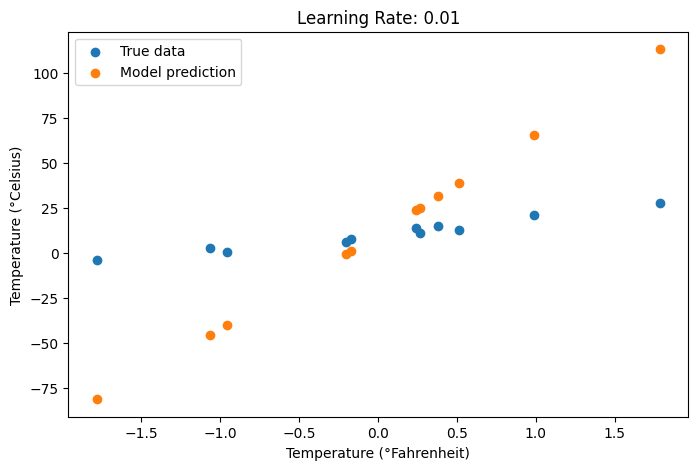

Final parameters for learning rate 0.01: [54.36126    1.6661702 10.484925 ]


Epoch 500, Loss 89.112267
Epoch 1000, Loss 74.920639
Epoch 1500, Loss 71.916328
Epoch 2000, Loss 70.442398
Epoch 2500, Loss 69.194366
Epoch 3000, Loss 67.995758
Epoch 3500, Loss 66.822357
Epoch 4000, Loss 65.670601
Epoch 4500, Loss 64.539665
Epoch 5000, Loss 63.429092


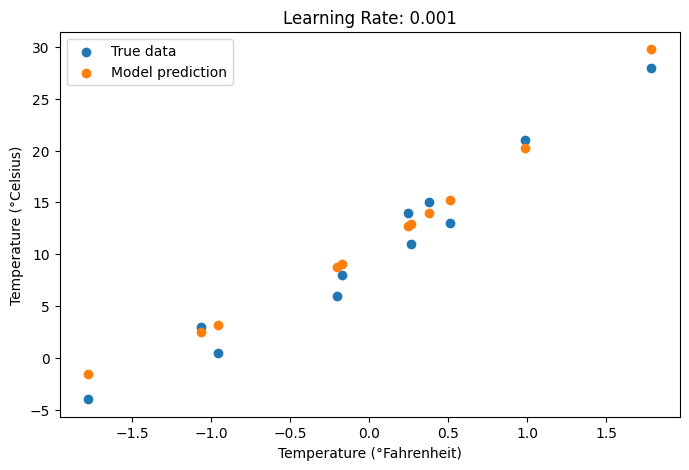

Final parameters for learning rate 0.001: [ 8.765261   1.1320237 10.489241 ]


Epoch 500, Loss 165.505722
Epoch 1000, Loss 149.031448
Epoch 1500, Loss 135.520248
Epoch 2000, Loss 124.435059
Epoch 2500, Loss 115.336090
Epoch 3000, Loss 107.863228
Epoch 3500, Loss 101.721771
Epoch 4000, Loss 96.670296
Epoch 4500, Loss 92.511322
Epoch 5000, Loss 89.083046


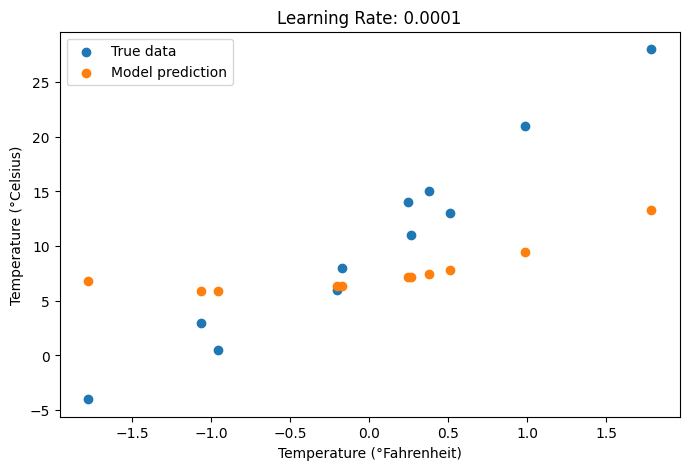

Final parameters for learning rate 0.0001: [1.8086686 1.0636903 6.631665 ]




In [24]:
#----------------------------- QUESTION 1-A/B SGD -----------------------------#

## Standardize the input data
t_u = (t_u - t_u.mean()) / t_u.std()

# Standardize the input data
t_un = 0.1 * t_u

# Initialize parameters
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

# Iterate over different learning rates
for lr in [0.1, 0.01, 0.001, 0.0001]:
    params = torch.tensor([w1, w2, b], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)

    training_loop_nonlinear(n_epochs=5000,
                            optimizer=optimizer,
                            params=params,
                            t_u=t_un,
                            t_c=t_c)

    # Plotting the results
    plt.figure(figsize=(8, 5))
    plt.scatter(t_u.numpy(), t_c.numpy(), label='True data')
    plt.scatter(t_u.numpy(), nonlinear_model(t_u, *params).detach().numpy(), label='Model prediction')
    plt.xlabel("Temperature (°Fahrenheit)")
    plt.ylabel("Temperature (°Celsius)")
    plt.title(f'Learning Rate: {lr}')
    plt.legend()
    plt.show()

    print(f'Final parameters for learning rate {lr}: {params.detach().numpy()}')
    print(f'\n')


Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719


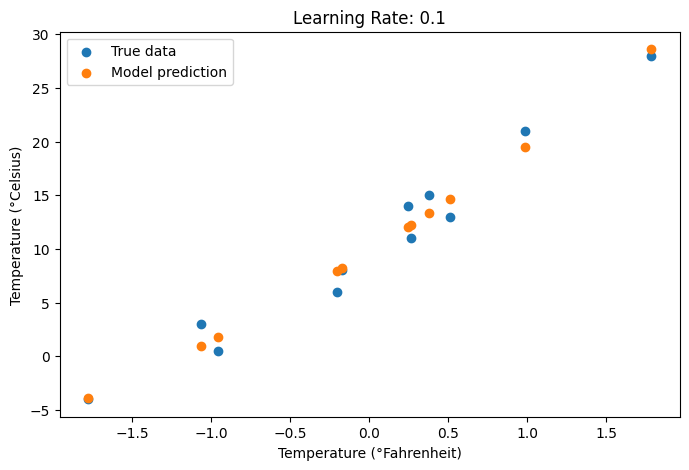

Final parameters for learning rate 0.1: [9.103332  0.8019011 9.771    ]


Epoch 500, Loss 37.810387
Epoch 1000, Loss 10.248041
Epoch 1500, Loss 3.446221
Epoch 2000, Loss 2.239089
Epoch 2500, Loss 2.099088
Epoch 3000, Loss 2.090908
Epoch 3500, Loss 2.090721
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


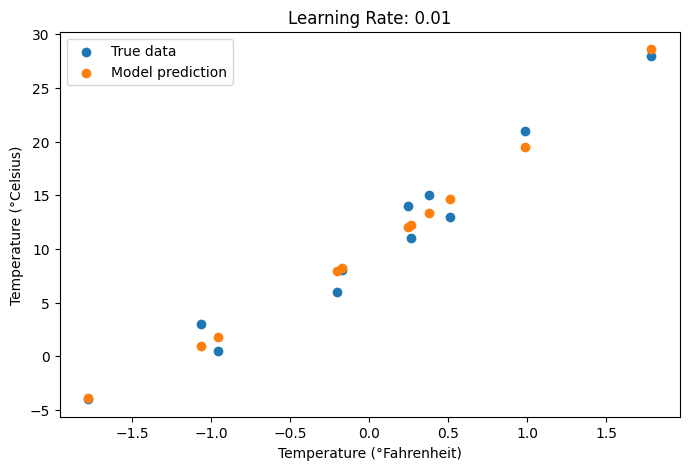

Final parameters for learning rate 0.01: [9.103354  0.8019186 9.770962 ]


Epoch 500, Loss 131.288879
Epoch 1000, Loss 112.093361
Epoch 1500, Loss 95.976517
Epoch 2000, Loss 82.460251
Epoch 2500, Loss 71.117157
Epoch 3000, Loss 61.545887
Epoch 3500, Loss 53.358559
Epoch 4000, Loss 46.194298
Epoch 4500, Loss 39.766365
Epoch 5000, Loss 33.912151


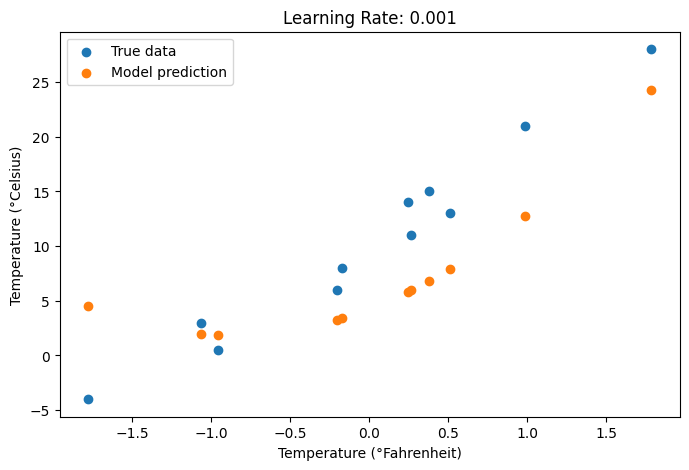

Final parameters for learning rate 0.001: [5.5004125 3.1722088 4.2494297]


Epoch 500, Loss 151.616013
Epoch 1000, Loss 149.195984
Epoch 1500, Loss 146.813461
Epoch 2000, Loss 144.466370
Epoch 2500, Loss 142.152756
Epoch 3000, Loss 139.871277
Epoch 3500, Loss 137.620499
Epoch 4000, Loss 135.399673
Epoch 4500, Loss 133.207901
Epoch 5000, Loss 131.044891


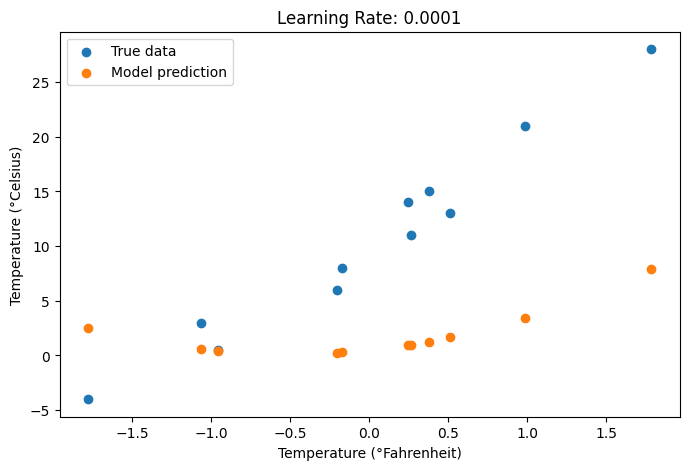

Final parameters for learning rate 0.0001: [1.4961503  1.4862977  0.49312234]




In [25]:
#--------------------------- QUESTION 1-A/B ADAM-------------------------------#
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

# Iterate over different learning rates
for lr in [0.1, 0.01, 0.001, 0.0001]:
    params = torch.tensor([w1, w2, b], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)

    training_loop_nonlinear(n_epochs=5000,
                            optimizer=optimizer,
                            params=params,
                            t_u=t_u,
                            t_c=t_c)

    # Plotting the results
    plt.figure(figsize=(8, 5))
    plt.scatter(t_u.numpy(), t_c.numpy(), label='True data')
    plt.scatter(t_u.numpy(), nonlinear_model(t_u, *params).detach().numpy(), label='Model prediction')
    plt.xlabel("Temperature (°Fahrenheit)")
    plt.ylabel("Temperature (°Celsius)")
    plt.title(f'Learning Rate: {lr}')
    plt.legend()
    plt.show()

    print(f'Final parameters for learning rate {lr}: {params.detach().numpy()}')
    print(f'\n')

EPOCHS - linear
Epoch 500, Loss 2.927646
Epoch 1000, Loss 2.927645
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927645
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927645
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927645
Epoch 4500, Loss 2.927645
Epoch 5000, Loss 2.927645


EPOCHS - non-linear
Epoch 500, Loss 2.092286
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719




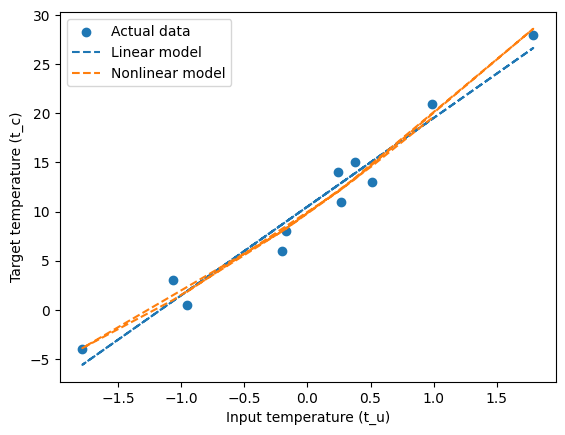



Final loss for Linear model: 2.927645206451416
Final loss for Nonlinear model: 2.09071946144104


In [26]:
#-------------------------------- QUESTION 1-C --------------------------------#
w_linear = torch.ones(())
b_linear = torch.zeros(())

params_linear = torch.tensor([1.0, 0.0],requires_grad=True)
params_nonlinear = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer_linear = torch.optim.SGD([params_linear], lr=1e-2)
optimizer_nonlinear = torch.optim.SGD([params_nonlinear], lr=1e-2)

# Number of epochs
n_epochs = 5000

print(f'EPOCHS - linear')
# Train the linear model using the training loop
trained_params_linear = training_loop_linear(n_epochs, optimizer_linear, params_linear, t_u, t_c)

print(f'\n')
print(f'EPOCHS - non-linear')
# Train the nonlinear model using the training loop
trained_params_nonlinear = training_loop_nonlinear(n_epochs, optimizer_nonlinear, params_nonlinear, t_u, t_c)

# Visualize the results
t_p_linear = linear_model(t_u, *trained_params_linear)
t_p_nonlinear = nonlinear_model(t_u, *trained_params_nonlinear.detach().numpy())

print(f'\n')
plt.scatter(t_u, t_c, label='Actual data')
plt.plot(t_u, t_p_linear.detach().numpy(), label='Linear model', linestyle='--')
plt.plot(t_u, t_p_nonlinear, label='Nonlinear model', linestyle='--')
plt.xlabel('Input temperature (t_u)')
plt.ylabel('Target temperature (t_c)')
plt.legend()
plt.show()

# Print the final loss for both models
final_loss_linear = loss_fn(linear_model(t_u, *trained_params_linear), t_c)
final_loss_nonlinear = loss_fn(nonlinear_model(t_u, *trained_params_nonlinear), t_c)

print(f'\n')
print(f'Final loss for Linear model: {final_loss_linear.item()}')
print(f'Final loss for Nonlinear model: {final_loss_nonlinear.item()}')



Training with SGD and Learning Rate: 0.1

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 19957270183936.0000
Epoch 500, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 1000, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 1500, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 2000, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 2500, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 3000, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 3500, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 4000, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 4500, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000
Epoch 4999, Train Loss: 1350008045568.0000, Val Loss: 2292721647616.0000




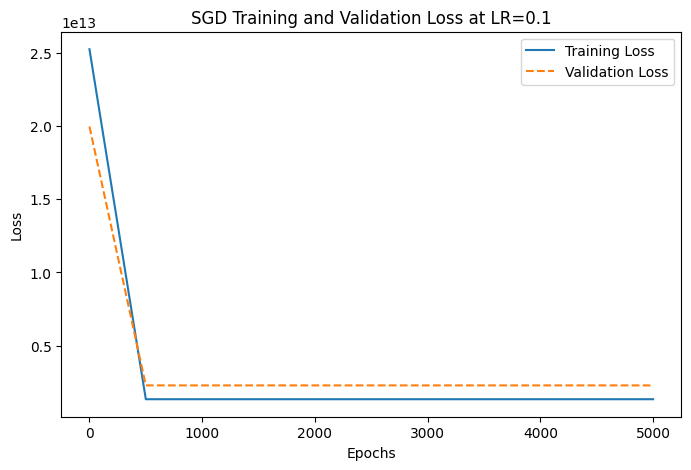


Training with SGD and Learning Rate: 0.01

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 29008293003264.0000
Epoch 500, Train Loss: 1350011060224.0000, Val Loss: 2292622032896.0000
Epoch 1000, Train Loss: 1350008176640.0000, Val Loss: 2292724269056.0000
Epoch 1500, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 2000, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 2500, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 3000, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 3500, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 4000, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 4500, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000
Epoch 4999, Train Loss: 1350008176640.0000, Val Loss: 2292724531200.0000




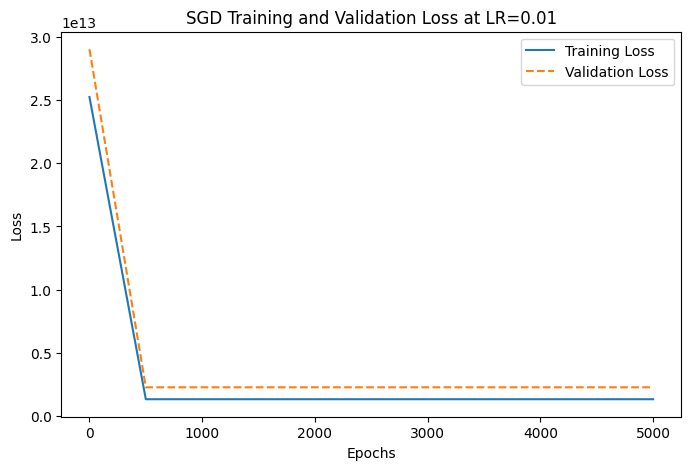


Training with SGD and Learning Rate: 0.001

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 30016767262720.0000
Epoch 500, Train Loss: 4506300973056.0000, Val Loss: 6232625643520.0000
Epoch 1000, Train Loss: 1788144123904.0000, Val Loss: 2947860398080.0000
Epoch 1500, Train Loss: 1413957419008.0000, Val Loss: 2422975496192.0000
Epoch 2000, Train Loss: 1360212525056.0000, Val Loss: 2323487129600.0000
Epoch 2500, Train Loss: 1351890632704.0000, Val Loss: 2300719923200.0000
Epoch 3000, Train Loss: 1350424330240.0000, Val Loss: 2294725214208.0000
Epoch 3500, Train Loss: 1350116311040.0000, Val Loss: 2293077377024.0000
Epoch 4000, Train Loss: 1350039633920.0000, Val Loss: 2292664238080.0000
Epoch 4500, Train Loss: 1350017744896.0000, Val Loss: 2292601323520.0000
Epoch 4999, Train Loss: 1350011322368.0000, Val Loss: 2292626227200.0000




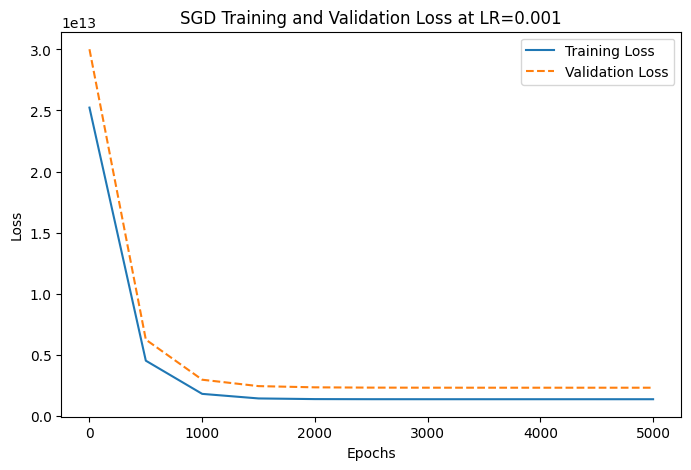


Training with SGD and Learning Rate: 0.0001

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 30118651101184.0000
Epoch 500, Train Loss: 20790521102336.0000, Val Loss: 25016116707328.0000
Epoch 1000, Train Loss: 17190872940544.0000, Val Loss: 20884754530304.0000
Epoch 1500, Train Loss: 14270253236224.0000, Val Loss: 17531800649728.0000
Epoch 2000, Train Loss: 11897023758336.0000, Val Loss: 14804736540672.0000
Epoch 2500, Train Loss: 9966116143104.0000, Val Loss: 12582369886208.0000
Epoch 3000, Train Loss: 8393325543424.0000, Val Loss: 10767989473280.0000
Epoch 3500, Train Loss: 7111006224384.0000, Val Loss: 9284199907328.0000
Epoch 4000, Train Loss: 6064639049728.0000, Val Loss: 8068845273088.0000
Epoch 4500, Train Loss: 5210195886080.0000, Val Loss: 7071883329536.0000
Epoch 4999, Train Loss: 4513281343488.0000, Val Loss: 6254368391168.0000




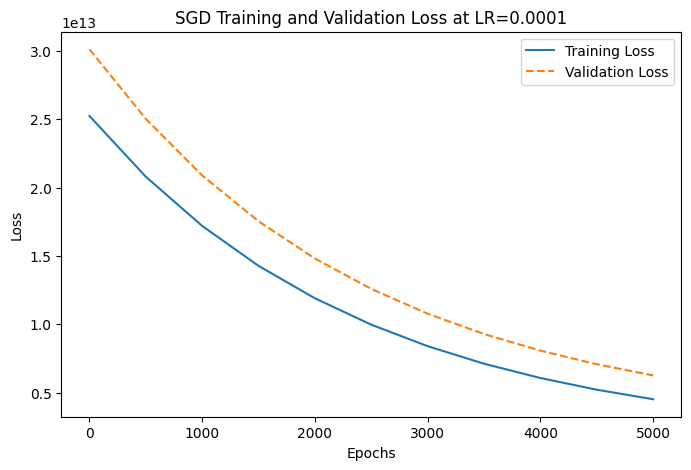


 Best model parameters: (tensor([669612.9375, 113184.3828, 593848.4375, 428446.9375, 290856.2188],
       requires_grad=True), tensor([4744169.5000], requires_grad=True))


In [27]:
#------------------------------- QUESTION 2 SGD ------------------------------#S
# Load and preprocess the dataset
df = pd.read_csv('Housing.csv')
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Set parameters and train the models
epochs = 5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:

    epoch_intervals = np.arange(0, epochs + 1, 500)

    # Train with SGD
    print(f'\nTraining with SGD and Learning Rate: {lr}\n')
    sgd_w, sgd_b, sgd_loss, sgd_val_loss = train(X_train, y_train, epochs, lr, 'sgd')
    print(f'\n')

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_intervals, sgd_loss, label='Training Loss')
    plt.plot(epoch_intervals, sgd_val_loss, label='Validation Loss', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'SGD Training and Validation Loss at LR={lr}')
    plt.legend()
    plt.show()

    # Update best model based on validation loss
    if min( sgd_val_loss) < best_val_loss:
        best_val_loss = min( sgd_val_loss)
        best_model = (sgd_w, sgd_b)

print(f"\n Best model parameters: {best_model}")



Training with Adam and Learning Rate: 0.1

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 30129977819136.0000
Epoch 500, Train Loss: 25233966759936.0000, Val Loss: 30128786636800.0000
Epoch 1000, Train Loss: 25233148870656.0000, Val Loss: 30127597551616.0000
Epoch 1500, Train Loss: 25232330981376.0000, Val Loss: 30126402174976.0000
Epoch 2000, Train Loss: 25231515189248.0000, Val Loss: 30125215186944.0000
Epoch 2500, Train Loss: 25230699397120.0000, Val Loss: 30124024004608.0000
Epoch 3000, Train Loss: 25229881507840.0000, Val Loss: 30122828627968.0000
Epoch 3500, Train Loss: 25229061521408.0000, Val Loss: 30121641639936.0000
Epoch 4000, Train Loss: 25228245729280.0000, Val Loss: 30120452554752.0000
Epoch 4500, Train Loss: 25227425742848.0000, Val Loss: 30119263469568.0000
Epoch 4999, Train Loss: 25226612047872.0000, Val Loss: 30118072287232.0000




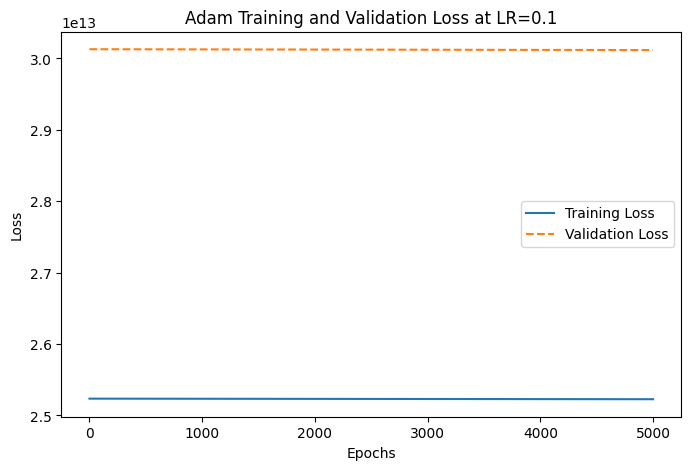


Training with Adam and Learning Rate: 0.01

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 30129982013440.0000
Epoch 500, Train Loss: 25234702860288.0000, Val Loss: 30129860378624.0000
Epoch 1000, Train Loss: 25234623168512.0000, Val Loss: 30129740840960.0000
Epoch 1500, Train Loss: 25234539282432.0000, Val Loss: 30129623400448.0000
Epoch 2000, Train Loss: 25234457493504.0000, Val Loss: 30129503862784.0000
Epoch 2500, Train Loss: 25234375704576.0000, Val Loss: 30129384325120.0000
Epoch 3000, Train Loss: 25234291818496.0000, Val Loss: 30129264787456.0000
Epoch 3500, Train Loss: 25234214223872.0000, Val Loss: 30129147346944.0000
Epoch 4000, Train Loss: 25234132434944.0000, Val Loss: 30129025712128.0000
Epoch 4500, Train Loss: 25234048548864.0000, Val Loss: 30128910368768.0000
Epoch 4999, Train Loss: 25233966759936.0000, Val Loss: 30128788733952.0000




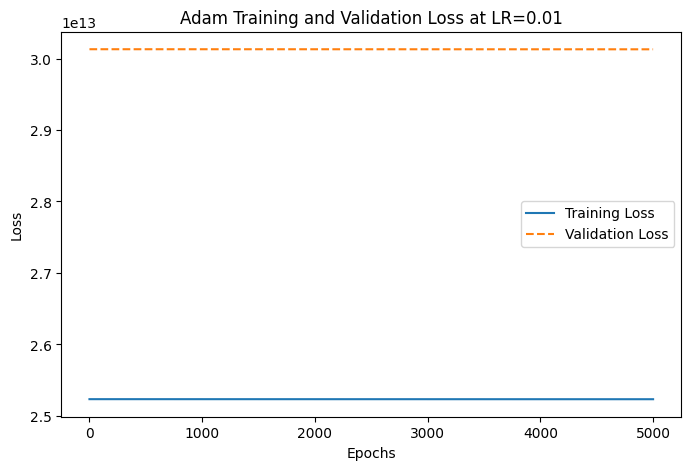


Training with Adam and Learning Rate: 0.001

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 30129982013440.0000
Epoch 500, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000
Epoch 1000, Train Loss: 25234767872000.0000, Val Loss: 30129954750464.0000
Epoch 1500, Train Loss: 25234759483392.0000, Val Loss: 30129944264704.0000
Epoch 2000, Train Loss: 25234751094784.0000, Val Loss: 30129933778944.0000
Epoch 2500, Train Loss: 25234744803328.0000, Val Loss: 30129921196032.0000
Epoch 3000, Train Loss: 25234738511872.0000, Val Loss: 30129904418816.0000
Epoch 3500, Train Loss: 25234728026112.0000, Val Loss: 30129898127360.0000
Epoch 4000, Train Loss: 25234721734656.0000, Val Loss: 30129885544448.0000
Epoch 4500, Train Loss: 25234713346048.0000, Val Loss: 30129875058688.0000
Epoch 4999, Train Loss: 25234702860288.0000, Val Loss: 30129860378624.0000




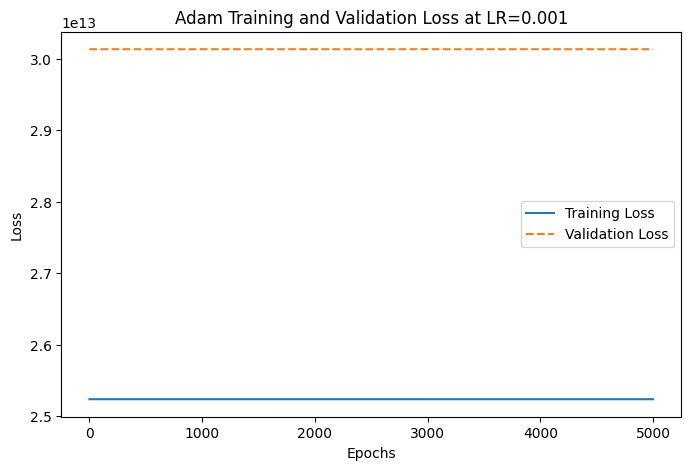


Training with Adam and Learning Rate: 0.0001

Epoch 0, Train Loss: 25234784649216.0000, Val Loss: 30129982013440.0000
Epoch 500, Train Loss: 25234784649216.0000, Val Loss: 30129977819136.0000
Epoch 1000, Train Loss: 25234784649216.0000, Val Loss: 30129977819136.0000
Epoch 1500, Train Loss: 25234784649216.0000, Val Loss: 30129973624832.0000
Epoch 2000, Train Loss: 25234782552064.0000, Val Loss: 30129973624832.0000
Epoch 2500, Train Loss: 25234780454912.0000, Val Loss: 30129973624832.0000
Epoch 3000, Train Loss: 25234780454912.0000, Val Loss: 30129973624832.0000
Epoch 3500, Train Loss: 25234780454912.0000, Val Loss: 30129973624832.0000
Epoch 4000, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000
Epoch 4500, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000
Epoch 4999, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000




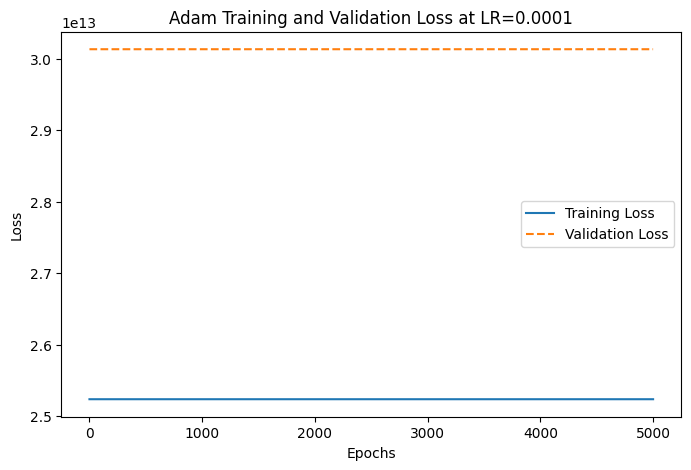


 Best model parameters: (tensor([500.9209, 500.8973, 500.9059, 500.9003, 500.9054],
       requires_grad=True), tensor([500.0081], requires_grad=True))


In [28]:
#------------------------------- QUESTION 2 ADAM ------------------------------#

# Load and preprocess the dataset
df = pd.read_csv('Housing.csv')
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)


# Set parameters and train the models
epochs = 5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:

    epoch_intervals = np.arange(0, epochs + 1, 500)

    # Train with Adam
    print(f'\nTraining with Adam and Learning Rate: {lr}\n')
    adam_w, adam_b, adam_loss, adam_val_loss = train(X_train, y_train, epochs, lr, 'adam')
    print('\n')

    # Plotting for Adam
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_intervals, adam_loss, label='Training Loss')
    plt.plot(epoch_intervals, adam_val_loss, label='Validation Loss', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Adam Training and Validation Loss at LR={lr}')
    plt.legend()
    plt.show()

    # Update best model based on validation loss
    if min( adam_val_loss) < best_val_loss:
        best_val_loss = min( adam_val_loss)
        best_model = (adam_w, adam_b)

print(f"\n Best model parameters: {best_model}")


Training with SGD and Learning Rate: 0.1

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 19326369267712.0000
Epoch 500, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 1000, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 1500, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 2000, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 2500, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 3000, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 3500, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 4000, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 4500, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000
Epoch 4999, Train Loss: 992480919552.0000, Val Loss: 1800794013696.0000




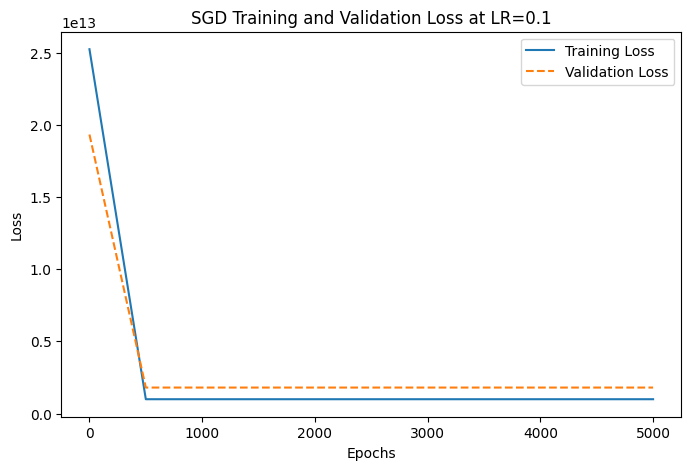


Training with SGD and Learning Rate: 0.01

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 28928691404800.0000
Epoch 500, Train Loss: 992489504768.0000, Val Loss: 1799827226624.0000
Epoch 1000, Train Loss: 992480985088.0000, Val Loss: 1800789426176.0000
Epoch 1500, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 2000, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 2500, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 3000, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 3500, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 4000, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 4500, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000
Epoch 4999, Train Loss: 992480985088.0000, Val Loss: 1800797421568.0000




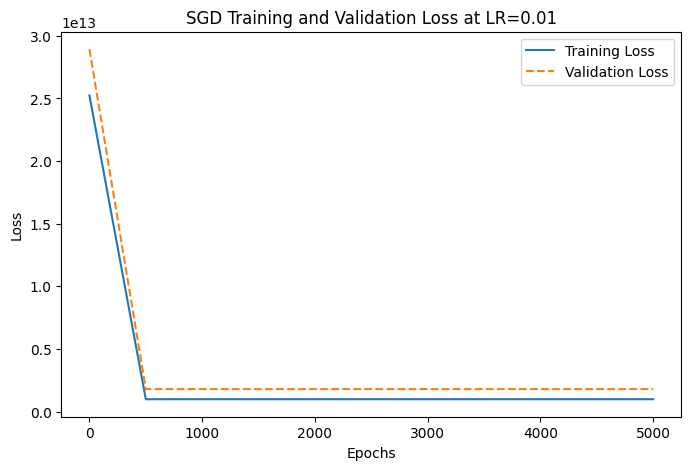


Training with SGD and Learning Rate: 0.001

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 30008636604416.0000
Epoch 500, Train Loss: 4117712076800.0000, Val Loss: 5640966111232.0000
Epoch 1000, Train Loss: 1429867593728.0000, Val Loss: 2408451670016.0000
Epoch 1500, Train Loss: 1057428930560.0000, Val Loss: 1901409730560.0000
Epoch 2000, Train Loss: 1003272601600.0000, Val Loss: 1812762066944.0000
Epoch 2500, Train Loss: 994647015424.0000, Val Loss: 1797171707904.0000
Epoch 3000, Train Loss: 993029259264.0000, Val Loss: 1795752329216.0000
Epoch 3500, Train Loss: 992650067968.0000, Val Loss: 1796925423616.0000
Epoch 4000, Train Loss: 992540229632.0000, Val Loss: 1798216220672.0000
Epoch 4500, Train Loss: 992503398400.0000, Val Loss: 1799171342336.0000
Epoch 4999, Train Loss: 992489897984.0000, Val Loss: 1799800487936.0000




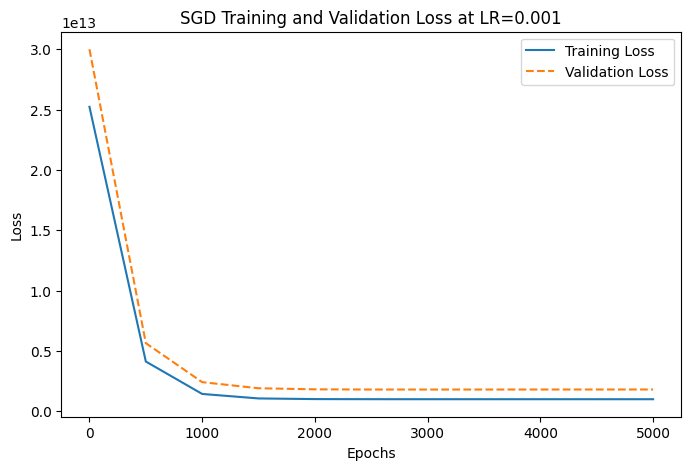


Training with SGD and Learning Rate: 0.0001

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 30117824823296.0000
Epoch 500, Train Loss: 20559058436096.0000, Val Loss: 24705824194560.0000
Epoch 1000, Train Loss: 16840466104320.0000, Val Loss: 20404376698880.0000
Epoch 1500, Train Loss: 13864206860288.0000, Val Loss: 16963015278592.0000
Epoch 2000, Train Loss: 11469885276160.0000, Val Loss: 14194511446016.0000
Epoch 2500, Train Loss: 9535839272960.0000, Val Loss: 11956967702528.0000
Epoch 3000, Train Loss: 7968563658752.0000, Val Loss: 10141549199360.0000
Epoch 3500, Train Loss: 6695232208896.0000, Val Loss: 8663764828160.0000
Epoch 4000, Train Loss: 5658639335424.0000, Val Loss: 7457474609152.0000
Epoch 4500, Train Loss: 4813405290496.0000, Val Loss: 6470418038784.0000
Epoch 4999, Train Loss: 4124584706048.0000, Val Loss: 5662538989568.0000




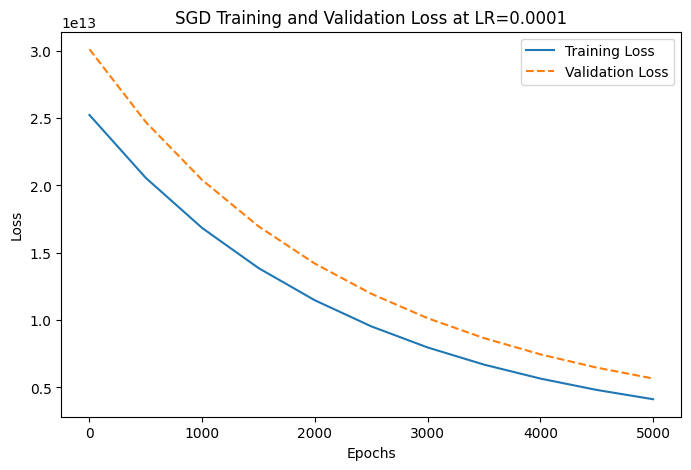


 Best model parameters: (tensor([514644.7500,  60484.5195, 555610.4375, 367653.9062, 144614.6406,
         94223.5625, 205964.5781, 149313.6875, 376646.9688, 212981.9844,
        269570.7188], requires_grad=True), tensor([4741068.5000], requires_grad=True))


In [29]:
#------------------------------- QUESTION 3 SGD ------------------------------#
# Load your dataset
data = pd.read_csv('Housing.csv')

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[varlist] = data[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price'].values

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Set parameters and train the models
epochs = 5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:

    epoch_intervals = np.arange(0, epochs + 1, 500)

    # Train with SGD
    print(f'\nTraining with SGD and Learning Rate: {lr}\n')
    sgd_w, sgd_b, sgd_loss, sgd_val_loss = train(X_train, y_train, epochs, lr, 'sgd')
    print(f'\n')

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_intervals, sgd_loss, label='Training Loss')
    plt.plot(epoch_intervals, sgd_val_loss, label='Validation Loss', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'SGD Training and Validation Loss at LR={lr}')
    plt.legend()
    plt.show()

    # Update best model based on validation loss
    if min( sgd_val_loss) < best_val_loss:
        best_val_loss = min( sgd_val_loss)
        best_model = (sgd_w, sgd_b)

print(f"\n Best model parameters: {best_model}")



Training with Adam and Learning Rate: 0.1

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 30129969430528.0000
Epoch 500, Train Loss: 25233666867200.0000, Val Loss: 30128444801024.0000
Epoch 1000, Train Loss: 25232561668096.0000, Val Loss: 30126909685760.0000
Epoch 1500, Train Loss: 25231450177536.0000, Val Loss: 30125385056256.0000
Epoch 2000, Train Loss: 25230336589824.0000, Val Loss: 30123858329600.0000
Epoch 2500, Train Loss: 25229229293568.0000, Val Loss: 30122329505792.0000
Epoch 3000, Train Loss: 25228117803008.0000, Val Loss: 30120804876288.0000
Epoch 3500, Train Loss: 25227010506752.0000, Val Loss: 30119276052480.0000
Epoch 4000, Train Loss: 25225899016192.0000, Val Loss: 30117749325824.0000
Epoch 4500, Train Loss: 25224789622784.0000, Val Loss: 30116222599168.0000
Epoch 4999, Train Loss: 25223678132224.0000, Val Loss: 30114697969664.0000




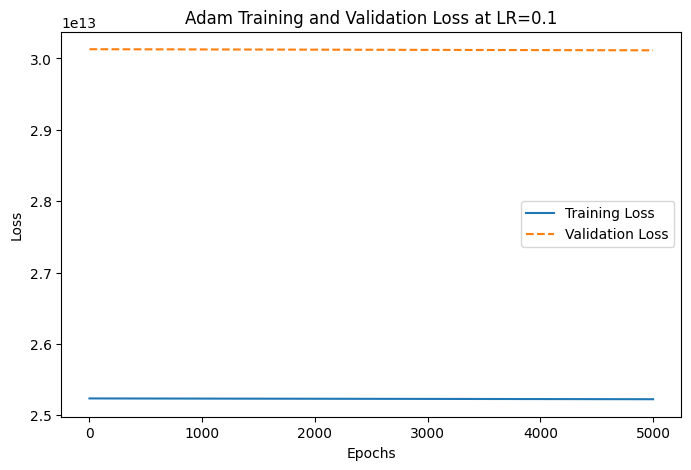


Training with Adam and Learning Rate: 0.01

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 30129973624832.0000
Epoch 500, Train Loss: 25234669305856.0000, Val Loss: 30129818435584.0000
Epoch 1000, Train Loss: 25234558156800.0000, Val Loss: 30129667440640.0000
Epoch 1500, Train Loss: 25234447007744.0000, Val Loss: 30129512251392.0000
Epoch 2000, Train Loss: 25234335858688.0000, Val Loss: 30129363353600.0000
Epoch 2500, Train Loss: 25234222612480.0000, Val Loss: 30129210261504.0000
Epoch 3000, Train Loss: 25234111463424.0000, Val Loss: 30129055072256.0000
Epoch 3500, Train Loss: 25234002411520.0000, Val Loss: 30128901980160.0000
Epoch 4000, Train Loss: 25233893359616.0000, Val Loss: 30128753082368.0000
Epoch 4500, Train Loss: 25233782210560.0000, Val Loss: 30128597893120.0000
Epoch 4999, Train Loss: 25233666867200.0000, Val Loss: 30128446898176.0000




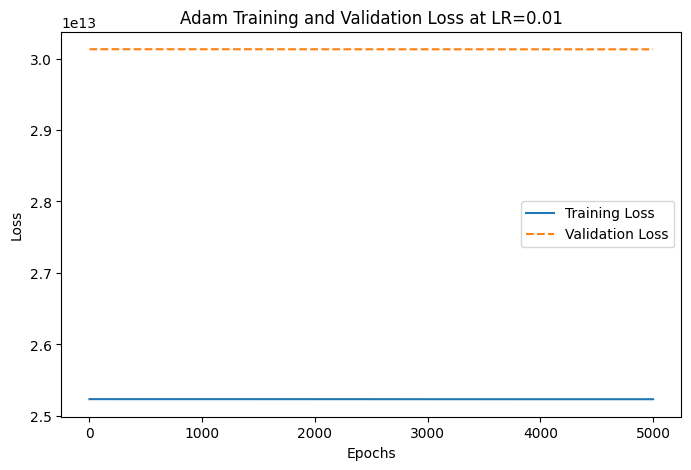


Training with Adam and Learning Rate: 0.001

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 30129973624832.0000
Epoch 500, Train Loss: 25234769969152.0000, Val Loss: 30129956847616.0000
Epoch 1000, Train Loss: 25234757386240.0000, Val Loss: 30129942167552.0000
Epoch 1500, Train Loss: 25234744803328.0000, Val Loss: 30129927487488.0000
Epoch 2000, Train Loss: 25234732220416.0000, Val Loss: 30129910710272.0000
Epoch 2500, Train Loss: 25234723831808.0000, Val Loss: 30129898127360.0000
Epoch 3000, Train Loss: 25234711248896.0000, Val Loss: 30129883447296.0000
Epoch 3500, Train Loss: 25234700763136.0000, Val Loss: 30129864572928.0000
Epoch 4000, Train Loss: 25234690277376.0000, Val Loss: 30129849892864.0000
Epoch 4500, Train Loss: 25234681888768.0000, Val Loss: 30129837309952.0000
Epoch 4999, Train Loss: 25234669305856.0000, Val Loss: 30129818435584.0000




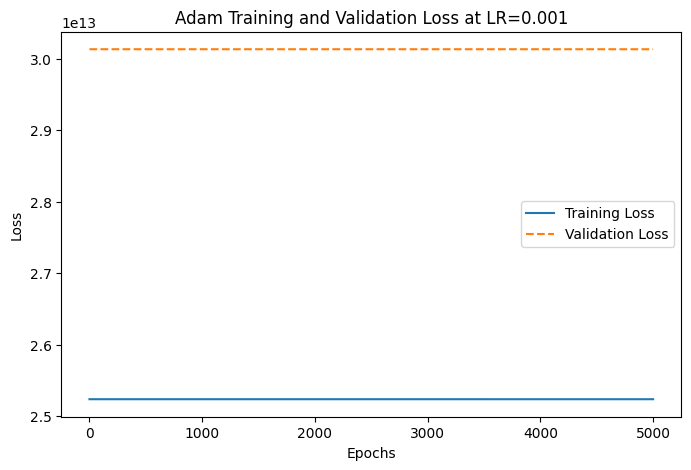


Training with Adam and Learning Rate: 0.0001

Epoch 0, Train Loss: 25234780454912.0000, Val Loss: 30129975721984.0000
Epoch 500, Train Loss: 25234780454912.0000, Val Loss: 30129973624832.0000
Epoch 1000, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000
Epoch 1500, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000
Epoch 2000, Train Loss: 25234778357760.0000, Val Loss: 30129969430528.0000
Epoch 2500, Train Loss: 25234774163456.0000, Val Loss: 30129963139072.0000
Epoch 3000, Train Loss: 25234769969152.0000, Val Loss: 30129963139072.0000
Epoch 3500, Train Loss: 25234769969152.0000, Val Loss: 30129961041920.0000
Epoch 4000, Train Loss: 25234769969152.0000, Val Loss: 30129961041920.0000
Epoch 4500, Train Loss: 25234769969152.0000, Val Loss: 30129956847616.0000
Epoch 4999, Train Loss: 25234769969152.0000, Val Loss: 30129956847616.0000




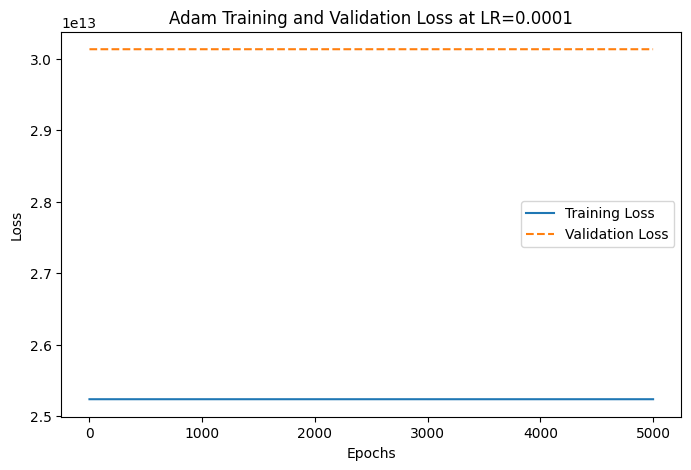


 Best model parameters: (tensor([500.9036, 500.8738, 500.8972, 500.8965, 500.8862, 500.8208,
        500.8552, 500.8613, 500.8979, 500.8963, 500.8958],
       requires_grad=True), tensor([500.0078], requires_grad=True))


In [31]:
#------------------------------- QUESTION 3 Adam ------------------------------#
# Load your dataset
data = pd.read_csv('Housing.csv')

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[varlist] = data[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price'].values

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Set parameters and train the models
epochs = 5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:

    epoch_intervals = np.arange(0, epochs + 1, 500)

    # Train with Adam
    print(f'\nTraining with Adam and Learning Rate: {lr}\n')
    adam_w, adam_b, adam_loss, adam_val_loss = train(X_train, y_train, epochs, lr, 'adam')
    print('\n')

    # Plotting for Adam
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_intervals, adam_loss, label='Training Loss')
    plt.plot(epoch_intervals, adam_val_loss, label='Validation Loss', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Adam Training and Validation Loss at LR={lr}')
    plt.legend()
    plt.show()

    # Update best model based on validation loss
    if min( adam_val_loss) < best_val_loss:
        best_val_loss = min( adam_val_loss)
        best_model = (adam_w, adam_b)

print(f"\n Best model parameters: {best_model}")